Importing the dependencies

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data collection and Pre-processing

In [2]:
heart_data = pd.read_csv("/content/heart_disease_data.csv")

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.shape

(303, 14)

In [5]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Splitting the data into features and target

In [6]:
X = heart_data.drop(columns = "target", axis = 1)
Y = heart_data["target"]

In [7]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233    1        0      150      0      2.3      0   0     1
1     37    1   2       130   250    0        1      187      0      3.5      0   0     2
2     41    0   1       130   204    0        0      172      0      1.4      2   0     2
3     56    1   1       120   236    0        1      178      0      0.8      2   0     2
4     57    0   0       120   354    0        1      163      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...    ...  ..   ...
298   57    0   0       140   241    0        1      123      1      0.2      1   0     3
299   45    1   3       110   264    0        1      132      0      1.2      1   0     3
300   68    1   0       144   193    1        1      141      0      3.4      1   2     3
301   57    1   0       130   131    0        1      115      1      1.2      1   1     3
302   57  

In [8]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Train Test Split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)


In [10]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


Using Logistics Regression Model

In [11]:
model = LogisticRegression(max_iter = 1000)

In [12]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

In [15]:
X_train_prediction = model.predict(X_train)
X_train_accuracy = accuracy_score(X_train_prediction, Y_train)
print(X_train_accuracy)

0.8553719008264463


In [16]:
X_test_prediction = model.predict(X_test)
X_test_accuracy = accuracy_score(X_test_prediction, Y_test)
print(X_test_accuracy)

0.8032786885245902


Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
cf_matrix = confusion_matrix(X_train_prediction, Y_train)
print(cf_matrix)

[[ 85  10]
 [ 25 122]]


Heatmap for Confusion Matrix

In [19]:
import seaborn as sns

<Axes: >

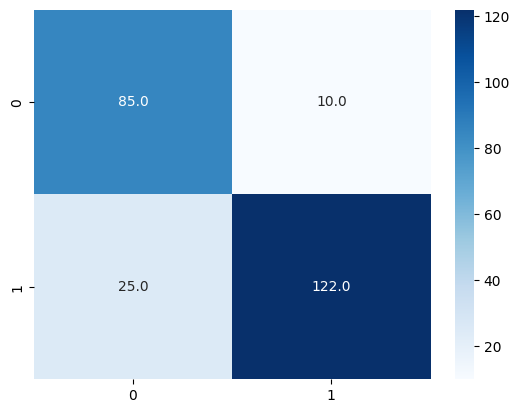

In [26]:
sns.heatmap(cf_matrix, annot = True, cmap = 'Blues', fmt=".1f" )

Precision

In [27]:
from sklearn.metrics import precision_score

In [28]:
# precision score for training data

precision_train = precision_score(X_train_prediction, Y_train)
print(precision_train)

0.9242424242424242


In [29]:
# precision for test data

precision_test = precision_score(X_test_prediction, Y_test)
print(precision_test)

0.8181818181818182


Recall

In [30]:
from sklearn.metrics import recall_score

In [31]:
# recall score for training data

recall_train = recall_score(X_train_prediction, Y_train)
print(recall_train)

0.8299319727891157


In [32]:
# recall score for test data

recall_test = recall_score(X_test_prediction, Y_test)
print(recall_test)

0.8181818181818182


F1 score

In [33]:
from sklearn.metrics import f1_score

In [36]:
f1_score_train = f1_score(X_train_prediction, Y_train)
print(f1_score_train)

0.8745519713261649


In [37]:
f1_score_test = f1_score(X_test_prediction, Y_test)
print(f1_score_test)

0.8181818181818182


Creating a function for precision, recall and f1_score

In [38]:
def precision_recall_f1score(true_labels, pred_labels):
  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print("precision =" , precision_value)
  print("recall =" , recall_value)
  print("f1_score =" , f1_score_value)

In [39]:
precision_recall_f1score(Y_train,X_train_prediction)

precision = 0.8299319727891157
recall = 0.9242424242424242
f1_score = 0.8745519713261649


In [40]:
precision_recall_f1score(X_test_prediction, Y_test)

precision = 0.8181818181818182
recall = 0.8181818181818182
f1_score = 0.8181818181818182
